# Visualización

Cuando trabajamos con imágenes, datos numéricos, variables categóricas, series temporales... es sencillo imaginar posibles visualizaciones para representar las distribuciones de los datos, algunas estadísticas, etc.

Cuando trabajamos con textos quizá no es tan intuitivo, ¿o si?

A continuación se muestran algunos ejemplos de visualización de datos cuando trabajamos en NLP.

# Frecuencia de palabras

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

In [12]:
# Prefacio del NLTK book
text = 'This is a book about Natural Language Processing. By "natural language" we mean a language that is used for everyday communication by humans; languages like English, Hindi or Portuguese. In contrast to artificial languages such as programming languages and mathematical notations, natural languages have evolved as they pass from generation to generation, and are hard to pin down with explicit rules. We will take Natural Language Processing — or NLP for short — in a wide sense to cover any kind of computer manipulation of natural language. At one extreme, it could be as simple as counting word frequencies to compare different writing styles. At the other extreme, NLP involves "understanding" complete human utterances, at least to the extent of being able to give useful responses to them. Technologies based on NLP are becoming increasingly widespread. For example, phones and handheld computers support predictive text and handwriting recognition; web search engines give access to information locked up in unstructured text; machine translation allows us to retrieve texts written in Chinese and read them in Spanish; text analysis enables us to detect sentiment in tweets and blogs. By providing more natural human-machine interfaces, and more sophisticated access to stored information, language processing has come to play a central role in the multilingual information society. This book provides a highly accessible introduction to the field of NLP. It can be used for individual study or as the textbook for a course on natural language processing or computational linguistics, or as a supplement to courses in artificial intelligence, text mining, or corpus linguistics. The book is intensely practical, containing hundreds of fully-worked examples and graded exercises. The book is based on the Python programming language together with an open source library called the Natural Language Toolkit (NLTK). NLTK includes extensive software, data, and documentation, all freely downloadable from http://nltk.org/. Distributions are provided for Windows, Macintosh and Unix platforms. We strongly encourage you to download Python and NLTK, and try out the examples and exercises along the way.'

In [13]:
words_nltk = text.lower().split()

In [14]:
words_nltk[:10]

['this',
 'is',
 'a',
 'book',
 'about',
 'natural',
 'language',
 'processing.',
 'by',
 '"natural']

In [15]:
wf = Counter(words_nltk)

In [22]:
wf_most_common = wf.most_common(25)

In [23]:
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]

In [24]:
freqs, words = zip(*sorted(zip(freqs, words)))

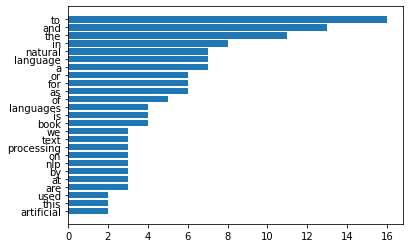

In [25]:
plt.barh(words, freqs)
plt.show()

# ... o de n-grams

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from nltk.probability import FreqDist

In [26]:
bigrams_ = list(ngrams(words_nltk, 2))
trigrams_ = list(ngrams(words_nltk, 3))

In [27]:
bigrams_[:10]

[('this', 'is'),
 ('is', 'a'),
 ('a', 'book'),
 ('book', 'about'),
 ('about', 'natural'),
 ('natural', 'language'),
 ('language', 'processing.'),
 ('processing.', 'by'),
 ('by', '"natural'),
 ('"natural', 'language"')]

In [28]:
trigrams_[:10]

[('this', 'is', 'a'),
 ('is', 'a', 'book'),
 ('a', 'book', 'about'),
 ('book', 'about', 'natural'),
 ('about', 'natural', 'language'),
 ('natural', 'language', 'processing.'),
 ('language', 'processing.', 'by'),
 ('processing.', 'by', '"natural'),
 ('by', '"natural', 'language"'),
 ('"natural', 'language"', 'we')]

In [29]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

In [30]:
bg_freq.most_common(10)

[(('natural', 'language'), 4),
 (('language', 'processing'), 3),
 (('used', 'for'), 2),
 (('to', 'the'), 2),
 (('based', 'on'), 2),
 (('access', 'to'), 2),
 (('us', 'to'), 2),
 (('or', 'as'), 2),
 (('the', 'book'), 2),
 (('book', 'is'), 2)]

In [31]:
tg_freq.most_common(10)

[(('natural', 'language', 'processing'), 2),
 (('the', 'book', 'is'), 2),
 (('this', 'is', 'a'), 1),
 (('is', 'a', 'book'), 1),
 (('a', 'book', 'about'), 1),
 (('book', 'about', 'natural'), 1),
 (('about', 'natural', 'language'), 1),
 (('natural', 'language', 'processing.'), 1),
 (('language', 'processing.', 'by'), 1),
 (('processing.', 'by', '"natural'), 1)]

In [32]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

In [33]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

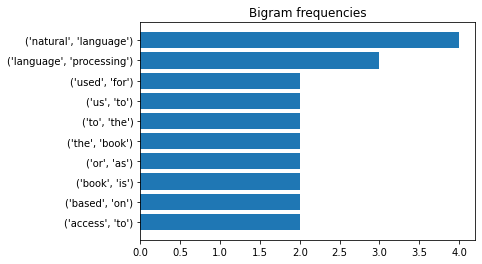

In [34]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

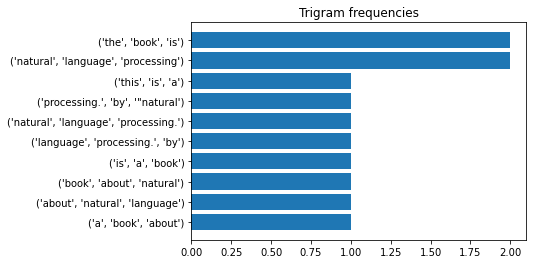

In [35]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

# Word cloud

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure( figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

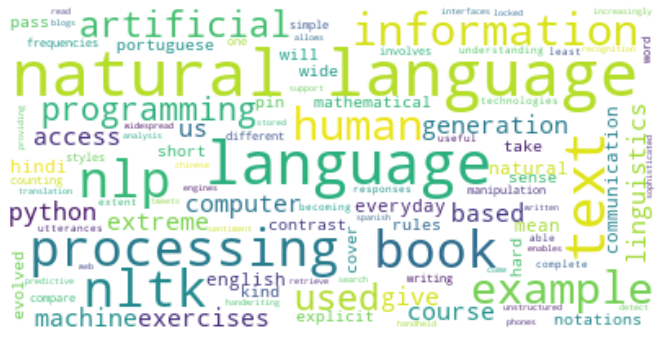

In [38]:
words_list = text.lower().strip().split()
plot_word_cloud(words_list)

# Dispersión léxica



In [ ]:
# import nltk
# nltk.download('book')
# from nltk.book import text4
# nltk.data.path

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot

In [ ]:
inaugural_folder = '../../datasets/inaugural'
inaugural_paths = [os.path.join(inaugural_folder, file) for file in sorted(os.listdir(inaugural_folder)) if '.txt' in file]

In [ ]:
inaugural_paths

In [ ]:
texts = list()
for file_path in inaugural_paths:
    with open(file_path, mode='r', encoding='latin-1') as f:
        texts.append(f.read())

## Ejemplo: Google Ngram Viewer

Buscador online que permite representar en un gráfico la frecuencia anual de distintos ngrams detectados en los corpus que tiene Google disponibles para multitud de idiomas.

<img src=https://images2.minutemediacdn.com/image/upload/c_fit,f_auto,fl_lossy,q_auto,w_728/v1555921104/shape/mentalfloss/screen_shot_2014-11-12_at_1.43.16_pm.png>

Link: https://books.google.com/ngrams#

Alguna curiosidad:
- Artículo: _Experiments in Ngram Art_, [link](https://www.mentalfloss.com/article/60033/experiments-ngram-art)
- TED Talk: _What we learned from 5 million books_, [link](https://www.ted.com/talks/jean_baptiste_michel_erez_lieberman_aiden_what_we_learned_from_5_million_books/up-next?language=en)

# Ley de Zipf

Formulada en la década de 1940 por el lingüista George Kingsley Zipf, establece que, dada una lengua, la frecuencia de aparición de las distintas palabras de su vocabulario sigue una distribución que puede aproximarse por:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/9fa76f350fe93da686890acfb9b8e3b1151b85bc>

Gráfico log-log con el ranking y la frecuencia de las 10 millones de palabras más frecuentes (medido con artículos de Wikipedia) para distintos idiomas:
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Zipf_30wiki_es_labels.png/1200px-Zipf_30wiki_es_labels.png>

In [ ]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist